
## Stroke Prediction Dataset
### 11 clinical features for predicting stroke events

In [52]:
# importing the needed df
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from dython.model_utils import metric_graph
import os
import plotly.express as px
from sklearn import set_config
set_config(display="diagram")

In [2]:
dataset = pd.read_csv("../streamlit_app_stroke_prediction/stroke_train.csv")
dataset.head(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [3]:
dataset.hypertension = dataset.hypertension.apply(lambda x: "Yes" if x == 1 else "No")
dataset.heart_disease = dataset.heart_disease.apply(lambda x: "Yes" if x == 1 else "No")
dataset.head(6)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,No,No,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
dataset[dataset.duplicated(subset= ["gender","age","hypertension","heart_disease","ever_married","work_type",\
    "Residence_type","avg_glucose_level","bmi","smoking_status","stroke"],keep="first")]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [5]:
dataset.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
dataset.bmi.mean()

28.893236911794673

In [7]:
dataset.bmi.fillna(dataset.bmi.mean(), inplace = True)

In [8]:
dataset.bmi.fillna(dataset.bmi.mean(), inplace = True)

In [9]:
dataset.isna().sum()


id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
# drop smoking status is null
dataset.smoking_status.fillna(np.nan, inplace = True)

In [11]:
dataset.dropna(how = "any", inplace = True)

In [12]:
dataset.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [13]:
shell = dataset.copy()
shell.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,No,No,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [14]:
age_hyper =  dataset.loc[:,["age","gender"]]
age_hyper

,age,gender
0,67.0,Male
1,61.0,Female
2,80.0,Male
3,49.0,Female
4,79.0,Female
...,...,...
5105,80.0,Female
5106,81.0,Female
5107,35.0,Female
5108,51.0,Male


In [15]:
age_hyper['age_cat'] = age_hyper.age.apply(lambda x :  "0-2" if 0 <= x<2 else
                                            "2-5" if 2<= x<= 5 else
                                            "6-13" if 5< x< 13 else
                                            "13-18" if 13<= x< 18 else
                                            "18-30" if 18<= x< 30 else
                                            "30-40" if 30<= x< 40 else
                                            "40-50" if 40<= x< 50 else
                                            "50-65" if 50<= x< 65 else
                                            "65+" if x>= 65 else "not known"
                                )

In [16]:
pivot_age = age_hyper.pivot_table(index = 'age_cat', columns='gender', values="age", aggfunc= 'count')
pivot_age

gender,Female,Male,Other
age_cat,,,
0-2,57.0,63.0,NaN
13-18,144.0,124.0,NaN
18-30,436.0,222.0,1.0
2-5,98.0,102.0,NaN
30-40,417.0,238.0,NaN
40-50,450.0,280.0,NaN
50-65,663.0,520.0,NaN
6-13,119.0,149.0,NaN
65+,610.0,417.0,NaN


In [17]:
fig = px.bar(pivot_age,barmode='group', width = 600)
fig.show()

In [18]:
gender_stat =   dataset.gender.value_counts().to_frame()
gender_stat

,gender
Female,2994
Male,2115
Other,1


<AxesSubplot:ylabel='gender'>

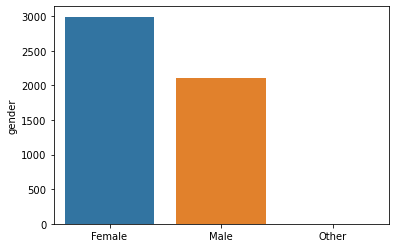

In [19]:

sns.barplot(data = gender_stat, x = gender_stat.index, y = gender_stat['gender'] )

In [20]:
dataset.to_csv("master_df.csv", index = False)

In [21]:
fig = px.pie(dataset.heart_disease.value_counts(), values = dataset.heart_disease.value_counts().values, names = \
    dataset.heart_disease.value_counts().index,width=500)
fig.update_traces(textposition='inside', textinfo='percent+label')

fig.show()

In [22]:
#  Ssmoking with heart diseas
gender_stroke = dataset.loc[:,["gender","stroke"]].groupby("gender").count()
gender_stroke

,stroke
gender,
Female,2994
Male,2115
Other,1


<AxesSubplot:xlabel='gender', ylabel='stroke'>

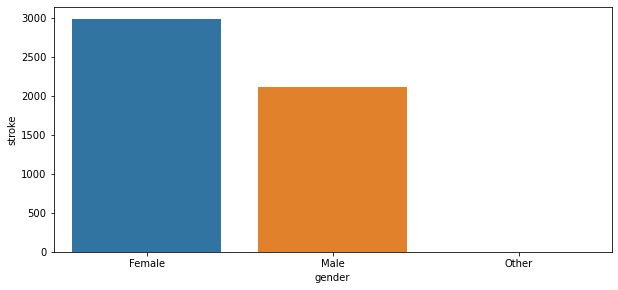

In [23]:
fig,(ax1) = plt.subplots(figsize = (10,4.5))
sns.barplot(data = gender_stroke, y = "stroke", x = gender_stroke.index, ax= ax1)

<AxesSubplot:xlabel='bmi', ylabel='age'>

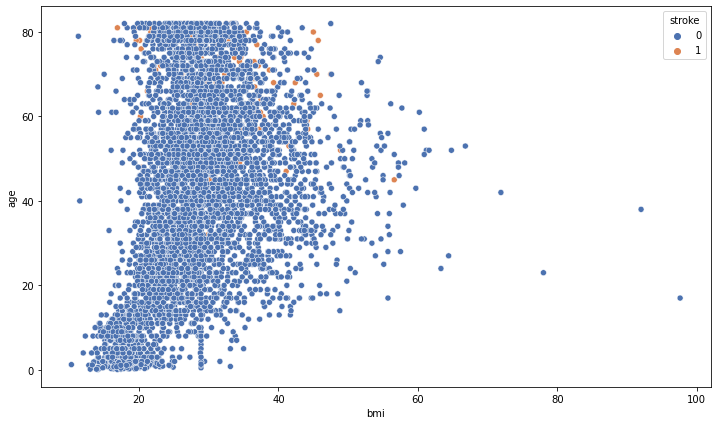

In [24]:
fig, ax = plt.subplots( figsize = (12,7))
sns.scatterplot( data = dataset, x  = dataset.bmi,  y =dataset.age, hue = 'stroke', ax = ax , palette = "deep")

<AxesSubplot:>

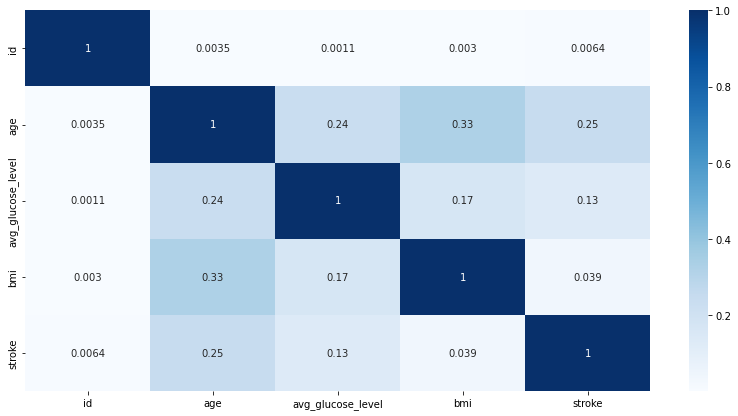

In [25]:
# feature correlation
fig,ax =plt.subplots(figsize = (14,7))
feature_check =sns.heatmap( dataset.corr(), cmap = "Blues", annot = True)
feature_check

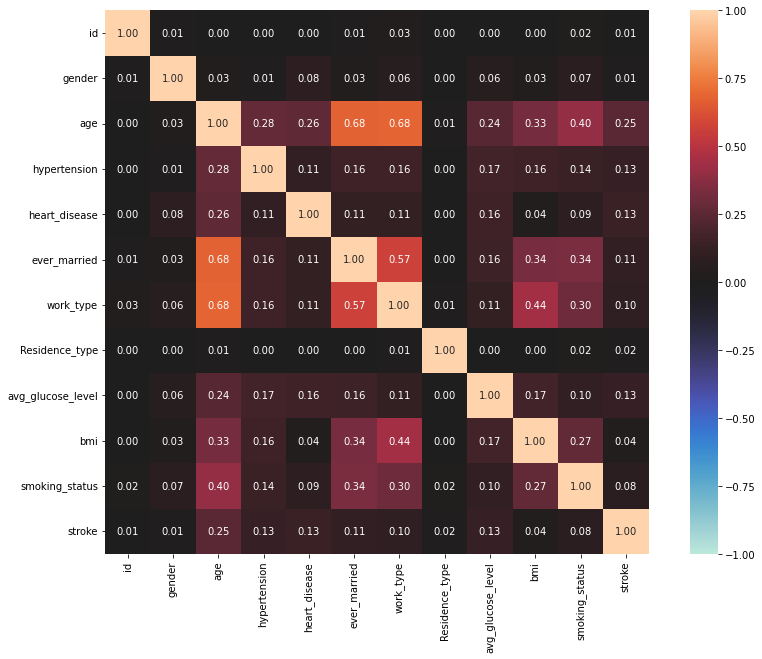

{'corr':                          id    gender       age  hypertension  heart_disease  \
 id                 1.000000  0.013127  0.003538      0.003550       0.001296   
 gender             0.013127  1.000000  0.029727      0.008949       0.083444   
 age                0.003538  0.029727  1.000000      0.276398       0.263796   
 hypertension       0.003550  0.008949  0.276398      1.000000       0.105937   
 heart_disease      0.001296  0.083444  0.263796      0.105937       1.000000   
 ever_married       0.013690  0.029870  0.679125      0.162965       0.112880   
 work_type          0.027792  0.058593  0.682044      0.160250       0.114262   
 Residence_type     0.001403  0.000000  0.014180      0.000000       0.000000   
 avg_glucose_level  0.001092  0.055912  0.238171      0.174474       0.161857   
 bmi                0.002999  0.028193  0.325942      0.160189       0.038899   
 smoking_status     0.019797  0.070888  0.399650      0.140514       0.090296   
 stroke             

In [26]:
associations(dataset, figsize = (15,10))

In [27]:


from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression



# Grouping by numerica and categorical columns and alsoe Split the dataset to X and y

In [28]:
# lets get the categorical and numeric columns
categorical_col = list(dataset.select_dtypes("object").drop(['Residence_type'],axis =1).columns)
categorical_col

['gender',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'smoking_status']

In [29]:
numerical_col = list(dataset.select_dtypes(exclude="object").drop(['id',"stroke"],axis =1).columns)
numerical_col

['age', 'avg_glucose_level', 'bmi']

In [30]:
X= dataset.drop(["id","Residence_type","stroke"],axis =1)
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
0,Male,67.0,No,Yes,Yes,Private,228.69,36.600000,formerly smoked
1,Female,61.0,No,No,Yes,Self-employed,202.21,28.893237,never smoked
2,Male,80.0,No,Yes,Yes,Private,105.92,32.500000,never smoked
3,Female,49.0,No,No,Yes,Private,171.23,34.400000,smokes
4,Female,79.0,Yes,No,Yes,Self-employed,174.12,24.000000,never smoked


In [31]:
y =dataset["stroke"]

## Preprocessing , change strings to numeric with OneHotEncoder

In [53]:
cat_pipeline = Pipeline(steps =[
                 ("ohe", OneHotEncoder(handle_unknown = "ignore")),
])

num_pipeline = Pipeline(steps = [
                  ("scaler", StandardScaler()),
  ])

In [54]:
# To Create ColumnTransformer to apply pipeline for each column set
from sklearn.compose import ColumnTransformer
transformer = ColumnTransformer([
    ("num_pipeline", num_pipeline,numerical_col),
    ("cat_pipeline",cat_pipeline,categorical_col)],
    remainder='drop'
    )

In [55]:
# Final pipeline to add a model or estimator
model = imbPipeline([
    ("transformer", transformer),
    # ("scaler",num_pipeline),
    ("smote", SMOTE(random_state = 42,k_neighbors= 10)),
    ("rfc",RandomForestClassifier(random_state=42)) 
    ])

In [35]:
# training test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,random_state= 42)

In [56]:
model.fit(X_train,y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'smoking_status'])])),
                ('smote', SMOTE(k_neighbors=10, random_state=42)),
                ('rfc', RandomForestClassifier(random_state=42))])

In [37]:
y_pred = model.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
print(f" Accuracy Score is {accuracy_score(y_test, y_pred)*100:.2f}%")

 Accuracy Score is 91.72%


In [40]:
cm = confusion_matrix(y_test, y_pred)
confusion_matrix_dataframe = pd.DataFrame(cm)
confusion_matrix_dataframe.to_csv("confusion_matrix_dataframe.csv", encoding='utf-8', index=False)


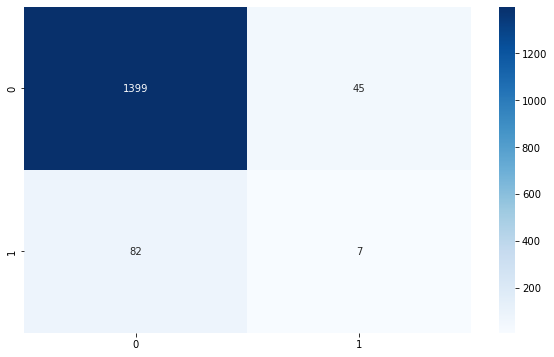

In [41]:
fig, ax = plt.subplots(figsize = (10,6))
cm_plot = sns.heatmap(pd.DataFrame(cm), annot = True, cmap = "Blues", fmt = "g")

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1444
           1       0.13      0.08      0.10        89

    accuracy                           0.92      1533
   macro avg       0.54      0.52      0.53      1533
weighted avg       0.90      0.92      0.91      1533



In [43]:
y_pred_proba = model.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

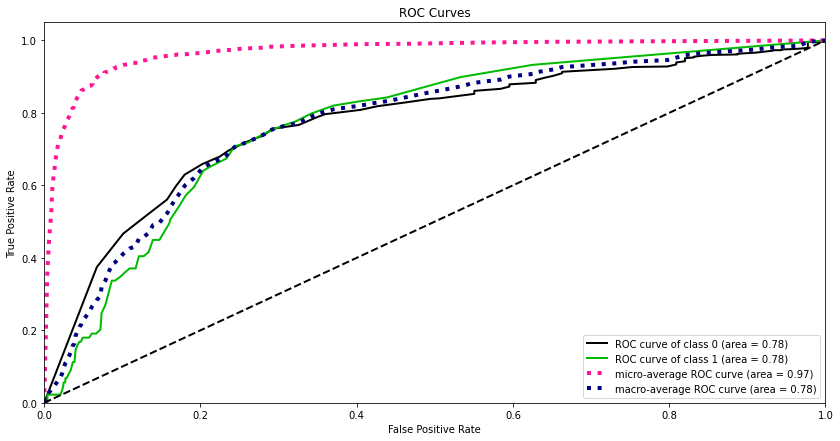

In [44]:
import scikitplot as skplt
fig, ax = plt.subplots(figsize=(14,7))
skplt.metrics.plot_roc(y_test, y_pred_proba,ax= ax)


# Saving model

In [45]:
import joblib
joblib.dump(model, "model_stroke.joblib")

['model_stroke.joblib']

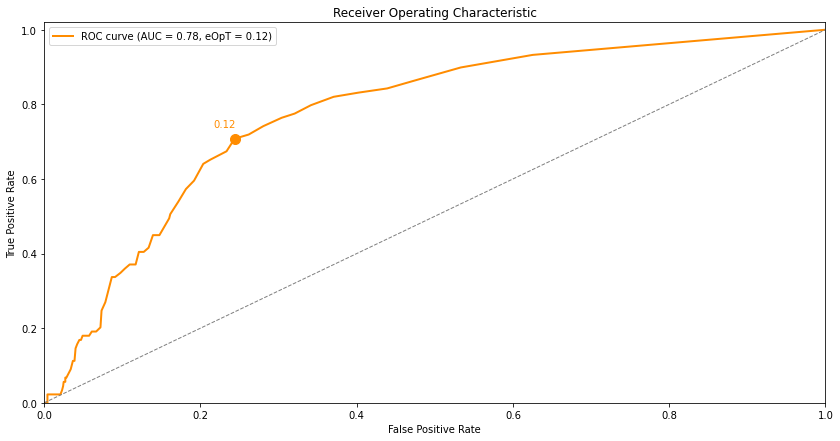

{'0': {'auc': {'val': 0.7751797441563696, 'naive': 0.5},
  'eopt': {'val': 0.12, 'x': 0.24376731301939059, 'y': 0.7078651685393258}},
 'ax': <AxesSubplot:title={'center':'Receiver Operating Characteristic'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>}

In [46]:
fig, ax = plt.subplots(figsize=(14,7))
metric_graph(y_test, y_pred_proba[:,1], metric = "roc", ax = ax)

In [47]:
y_test.shape, y_pred_proba[:,1].shape, y_pred.shape

((1533,), (1533,), (1533,))

In [48]:
model.predict(X.loc[945].to_frame().T)

array([0], dtype=int64)

In [49]:
X.loc[945].to_frame().T

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status
945,Female,57.0,No,No,Yes,Self-employed,128.28,34.2,never smoked


In [50]:
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'avg_glucose_level',
                                                   'bmi']),
                                                 ('cat_pipeline',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['gender', 'hypertension',
                                                   'heart_disease',
                                                   'ever_married', 'work_type',
                                                   'smoking_status'])])),
                ('smote', SMOTE(k_neighbors=10, r

In [51]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

# The nltk version is 3.0.0.
# The scikit-learn version is 0.15.2.

The nltk version is 3.7.
The scikit-learn version is 1.0.2.
